# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


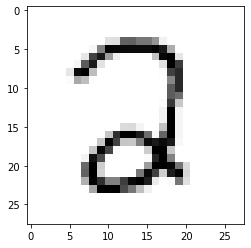

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.23929223444299574
train accuracy is: 0.7374394925721917, test accuracy is 0.7520161290322581


Epoch 10 Loss 0.1682438804547703
train accuracy is: 0.9020196962109831, test accuracy is 0.907258064516129


Epoch 20 Loss 0.0831184437411494
train accuracy is: 0.9238858287431146, test accuracy is 0.9319556451612904


Epoch 30 Loss 0.05616724163485629
train accuracy is: 0.9420797863461859, test accuracy is 0.9485887096774194


Epoch 40 Loss 0.0454251582489499
train accuracy is: 0.9489233850776164, test accuracy is 0.9571572580645161


Epoch 50 Loss 0.03977615797213459
train accuracy is: 0.9538474378234018, test accuracy is 0.9642137096774194


Epoch 60 Loss 0.03626153600790334
train accuracy is: 0.956434651977967, test accuracy is 0.9672379032258065


Epoch 70 Loss 0.03381272176605285
train accuracy is: 0.9591053246536472, test accuracy is 0.96875


Epoch 80 Loss 0.03197482773944744
train accuracy is: 0.9619429143715573, test accuracy is 0.9712701612903226


Epoch 90 Loss 0.03051362411095289
train accuracy is: 0.9640293773994325, test accuracy is 0.9707661290322581


Epoch 100 Loss 0.029304192966854423
train accuracy is: 0.9652812552161576, test accuracy is 0.9707661290322581


Epoch 110 Loss 0.028272910562445828
train accuracy is: 0.9664496745117677, test accuracy is 0.9717741935483871


Epoch 120 Loss 0.027382349080400912
train accuracy is: 0.9674511767651477, test accuracy is 0.9722782258064516


Epoch 130 Loss 0.026591838780171958
train accuracy is: 0.9682023034551828, test accuracy is 0.9727822580645161


Epoch 140 Loss 0.025883416908456015
train accuracy is: 0.9692038057085628, test accuracy is 0.9732862903225806


Epoch 150 Loss 0.025241382278482345
train accuracy is: 0.9695376397930229, test accuracy is 0.9737903225806451


Epoch 160 Loss 0.02466739009827874
train accuracy is: 0.9699549323985979, test accuracy is 0.9742943548387096


Epoch 170 Loss 0.0241317877889193
train accuracy is: 0.970789517609748, test accuracy is 0.9742943548387096


Epoch 180 Loss 0.023643826393973555
train accuracy is: 0.971457185778668, test accuracy is 0.9747983870967742


Epoch 190 Loss 0.023190799793233966
train accuracy is: 0.972291770989818, test accuracy is 0.9742943548387096


Epoch 200 Loss 0.022757514223577503
train accuracy is: 0.9733767317643132, test accuracy is 0.9742943548387096


Epoch 210 Loss 0.022352988962918048
train accuracy is: 0.9736271073276581, test accuracy is 0.9742943548387096


Epoch 220 Loss 0.021956675815874443
train accuracy is: 0.9739609414121182, test accuracy is 0.9737903225806451


Epoch 230 Loss 0.02157074723224862
train accuracy is: 0.9744616925388082, test accuracy is 0.9737903225806451


Epoch 240 Loss 0.021209091097087417
train accuracy is: 0.9749624436654982, test accuracy is 0.9737903225806451


0.036669809404481064

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23921708092754757
train accuracy is: 0.7310966449674512, test accuracy is 0.7338709677419355


Epoch 10 Loss 0.0983201149948818
train accuracy is: 0.9213820731096645, test accuracy is 0.9279233870967742


Epoch 20 Loss 0.07623409356419004
train accuracy is: 0.9327324319813053, test accuracy is 0.9430443548387096


Epoch 30 Loss 0.06607686337251993
train accuracy is: 0.9400767818394258, test accuracy is 0.9506048387096774


Epoch 40 Loss 0.05994520395827361
train accuracy is: 0.943832415289601, test accuracy is 0.9546370967741935


Epoch 50 Loss 0.055749825901131145
train accuracy is: 0.9473376731764314, test accuracy is 0.9571572580645161


Epoch 60 Loss 0.05265845488642993
train accuracy is: 0.9490903021198465, test accuracy is 0.9596774193548387


Epoch 70 Loss 0.050260948109867164
train accuracy is: 0.9510933066266066, test accuracy is 0.9611895161290323


Epoch 80 Loss 0.04833505530683992
train accuracy is: 0.9521782674011017, test accuracy is 0.9637096774193549


Epoch 90 Loss 0.046745755101377254
train accuracy is: 0.9535136037389418, test accuracy is 0.9647177419354839


Epoch 100 Loss 0.0454032422378468
train accuracy is: 0.9545985645134368, test accuracy is 0.9657258064516129


Epoch 110 Loss 0.04424930765142993
train accuracy is: 0.9552662326823569, test accuracy is 0.9652217741935484


Epoch 120 Loss 0.04324443452234091
train accuracy is: 0.9559339008512769, test accuracy is 0.9657258064516129


Epoch 130 Loss 0.04235790937991933
train accuracy is: 0.956935403104657, test accuracy is 0.9652217741935484


Epoch 140 Loss 0.04156901250958291
train accuracy is: 0.957603071273577, test accuracy is 0.9652217741935484


Epoch 150 Loss 0.04085969837289626
train accuracy is: 0.9581872809213821, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.040218151466948536
train accuracy is: 0.9585211150058421, test accuracy is 0.9662298387096774


Epoch 170 Loss 0.039633575756121815
train accuracy is: 0.9590218661325322, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.03909732415036225
train accuracy is: 0.9596060757803372, test accuracy is 0.9662298387096774


Epoch 190 Loss 0.038602911922741456
train accuracy is: 0.9599399098647972, test accuracy is 0.9662298387096774


Epoch 200 Loss 0.0381458614615911
train accuracy is: 0.9603572024703723, test accuracy is 0.9667338709677419


Epoch 210 Loss 0.03772191440617113
train accuracy is: 0.9606910365548322, test accuracy is 0.9667338709677419


Epoch 220 Loss 0.037325966109799734
train accuracy is: 0.9608579535970623, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.03695561446677523
train accuracy is: 0.9610248706392923, test accuracy is 0.9672379032258065


Epoch 240 Loss 0.03660820246769741
train accuracy is: 0.9611083291604072, test accuracy is 0.9672379032258065


0.028919750318477447

### Comparing results of NN and LR

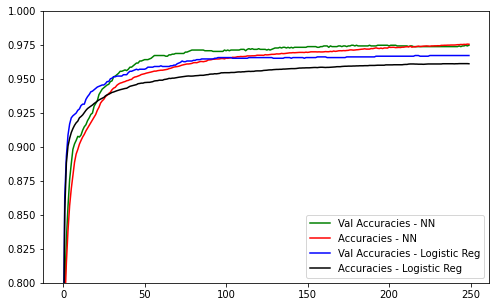

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

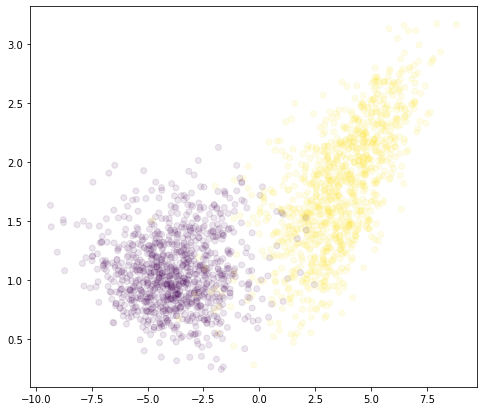

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

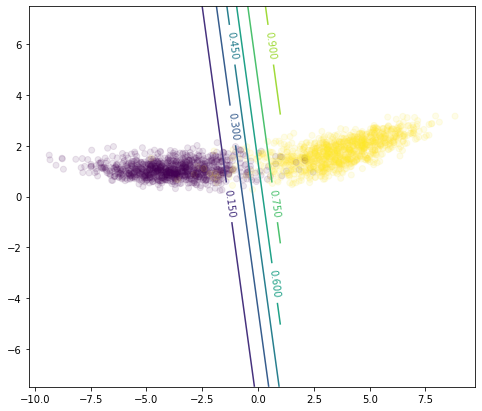

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );